In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline

LOAD DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df_train = pd.read_csv('/content/gdrive/My Drive/kendaraan/kendaraan_train.csv')
df_test = pd.read_csv('/content/gdrive/My Drive/kendaraan/kendaraan_test.csv')

In [ ]:
df_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [ ]:
df_test.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,2,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,3,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,4,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,5,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


PREPROCESSING DATA TRAIN

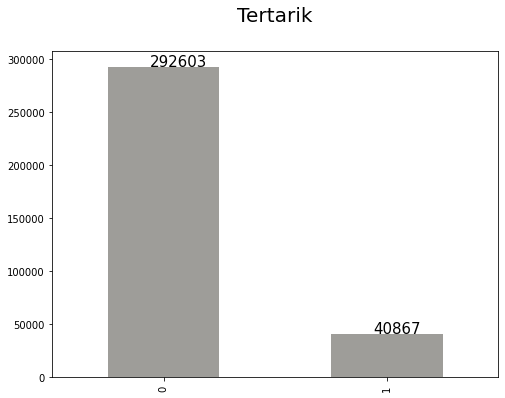

In [ ]:
#Visualisasi Class Target Tertarik
ax = df_train['Tertarik'].value_counts().plot(kind='bar', figsize=(8, 6), 
                                              color='#9e9d99')
ax.set_title('Tertarik', size=20, pad=30)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, 
            str(round(i.get_height(), 2)), fontsize=15)

In [ ]:
Tidak_count_0, Tertarik_count_1 = df_train['Tertarik'].value_counts()

#Memisahkan Class Target Tertarik dan Tidak Tertarik
Tidak_0 = df_train[df_train['Tertarik'] == 0]
Tertarik_1 = df_train[df_train['Tertarik'] == 1]

print("Tidak Tertarik (0) :", Tidak_0.shape)
print("Tertarik (1) :", Tertarik_1.shape)

Tidak Tertarik (0) : (292603, 12)
Tertarik (1) : (40867, 12)


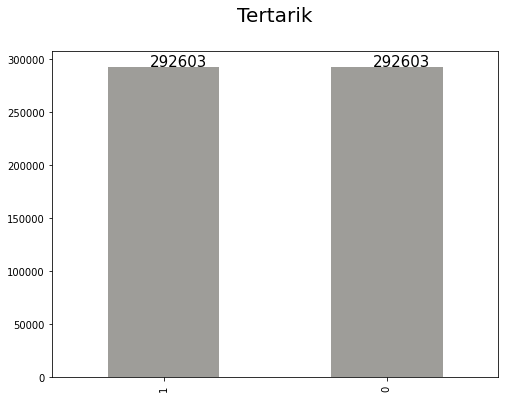

In [ ]:
#Oversampling
Tertarik_1_over = Tertarik_1.sample(Tidak_count_0, replace = True)
df_train_sampling = pd.concat([Tertarik_1_over, Tidak_0], axis=0)

#Visualisasi Class Target Tertarik
ax = df_train_sampling['Tertarik'].value_counts().plot(kind='bar', 
                                                       figsize=(8, 6), 
                                                       color='#9e9d99')
ax.set_title('Tertarik', size=20, pad=30)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 
                                                              2)), fontsize=15)

In [ ]:
#Cek Missing Values
df_train_sampling.isnull().sum()

id                       0
Jenis_Kelamin        25635
Umur                 24842
SIM                  25128
Kode_Daerah          25070
Sudah_Asuransi       25633
Umur_Kendaraan       25104
Kendaraan_Rusak      25130
Premi                26125
Kanal_Penjualan      24780
Lama_Berlangganan    24909
Tertarik                 0
dtype: int64

In [ ]:
df_train_sampling.dtypes

id                     int64
Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

In [ ]:
#Replace missing values dengan mean dan modus

mode = df_train_sampling['Jenis_Kelamin'].mode().values[0]
df_train_sampling['Jenis_Kelamin'].fillna(mode, inplace=True)

mean = df_train_sampling['Umur'].mean()
df_train_sampling['Umur'].fillna(mean, inplace=True)

mode = df_train_sampling['SIM'].mode().values[0]
df_train_sampling['SIM'].fillna(mode, inplace=True)

mode = df_train_sampling['Kode_Daerah'].mode().values[0]
df_train_sampling['Kode_Daerah'].fillna(mode, inplace=True)

mode = df_train_sampling['Sudah_Asuransi'].mode().values[0]
df_train_sampling['Sudah_Asuransi'].fillna(mode, inplace=True)

mode = df_train_sampling['Umur_Kendaraan'].mode().values[0]
df_train_sampling['Umur_Kendaraan'].fillna(mode, inplace=True)

mode = df_train_sampling['Kendaraan_Rusak'].mode().values[0]
df_train_sampling['Kendaraan_Rusak'].fillna(mode, inplace=True)

mean = df_train_sampling['Premi'].mean()
df_train_sampling['Premi'].fillna(mean, inplace=True)

mode = df_train_sampling['Kanal_Penjualan'].mode().values[0]
df_train_sampling['Kanal_Penjualan'].fillna(mode, inplace=True)

mean = df_train_sampling['Lama_Berlangganan'].mean()
df_train_sampling['Lama_Berlangganan'].fillna(mean, inplace=True)

In [ ]:
df_train_sampling.isnull().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


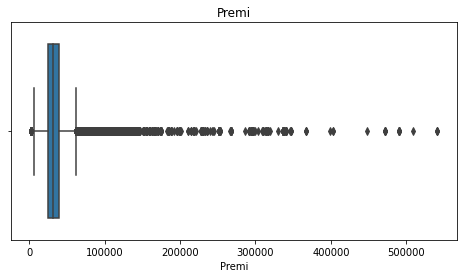

In [ ]:
#Cek Outliers
plt.fig,ax = plt.subplots(figsize=(8,4))
plt.fig = sns.boxplot(df_train_sampling.Premi).set_title('Premi')
plt.show()

In [ ]:
#Replace Outliers dengan Nilai Quantile

#Mencari Nilai Quantile
print(df_train_sampling['Premi'].quantile(0.10))
print(df_train_sampling['Premi'].quantile(0.90))

2630.0
48890.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


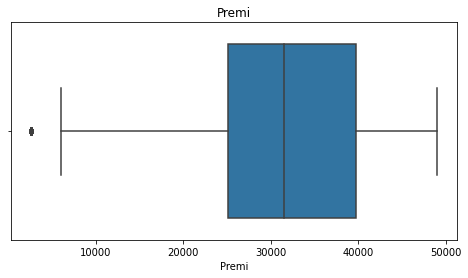

In [ ]:
df_train_sampling["Premi"] = np.where(df_train_sampling["Premi"] <2630.0, 2630.0,df_train_sampling['Premi'])
df_train_sampling["Premi"] = np.where(df_train_sampling["Premi"] >48964.0, 48964.0,df_train_sampling['Premi'])

#cek outliers
plt.fig,ax = plt.subplots(figsize=(8,4))
plt.fig = sns.boxplot(df_train_sampling.Premi).set_title('Premi')
plt.show()

In [ ]:
#Mengubah Data Categorical ke Data Numerical
df_train_sampling['Jenis_Kelamin'] = [0 if x == 'Pria' else 1 for x in df_train_sampling['Jenis_Kelamin']]
df_train_sampling['Kendaraan_Rusak'] = [1 if x == 'Pernah' else 0 for x in df_train_sampling['Kendaraan_Rusak']]
Umur_Kendaraan = {'< 1 Tahun':1, '1-2 Tahun':1.5, '> 2 Tahun':2}
df_train_sampling = df_train_sampling.replace({'Umur_Kendaraan':Umur_Kendaraan})

In [ ]:
df_train_sampling.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
68372,68373,1,55.0,1.0,28.0,0.0,1.5,1,45721.0,124.0,88.0,1
16856,16857,0,35.0,1.0,13.0,0.0,1.5,1,29008.0,152.0,200.0,1
277705,277706,0,23.0,1.0,12.0,0.0,1.0,1,36523.0,152.0,244.0,1
320102,320103,1,28.0,1.0,3.0,0.0,1.0,1,21329.0,156.0,19.0,1
307438,307439,1,34.0,1.0,3.0,0.0,1.5,1,31105.0,26.0,295.0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale hanya kolom yang memiliki value > 1
minmax = [col for col in df_train_sampling.columns if df_train_sampling[col].max() > 1]
mms = MinMaxScaler()
scaled = mms.fit_transform(df_train_sampling[minmax])
scaled = pd.DataFrame(scaled, columns=minmax)

# Replace dengan data yang sudah diskala
for col in scaled:
    df_train_sampling[col] = scaled[col]
    
df_train_sampling.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
68372,0.752406,1,0.320189,1.0,0.538462,0.0,0.5,1,1.000000,0.746914,0.681661,1
16856,0.805598,0,0.523077,1.0,0.288462,0.0,0.5,1,0.000000,0.932099,0.134948,1
277705,0.989879,0,0.861538,1.0,0.673077,0.0,0.5,1,0.873052,0.154321,0.072664,1
320102,0.094189,1,0.076923,1.0,0.288462,0.0,0.0,1,1.000000,0.932099,0.498980,1
307438,0.050889,1,0.153846,1.0,0.250000,0.0,0.0,1,0.671343,0.154321,0.221453,1


PREPROCESSING DATA TEST

In [ ]:
df_test_sampling = df_test.copy()

In [ ]:
#Cek Missing Values
df_test_sampling.isnull().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


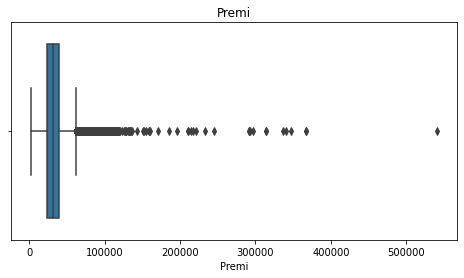

In [ ]:
#Cek Outliers
plt.fig,ax = plt.subplots(figsize=(8,4))
plt.fig = sns.boxplot(df_test_sampling.Premi).set_title('Premi')
plt.show()

In [ ]:
#Replace Outliers dengan Nilai Quantile

#Mencari Nilai Quantile
print(df_test_sampling['Premi'].quantile(0.10))
print(df_test_sampling['Premi'].quantile(0.90))

2630.0
48524.200000000004


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


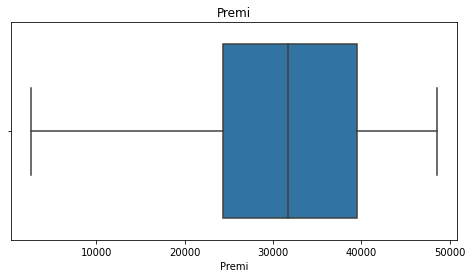

In [ ]:
df_test_sampling["Premi"] = np.where(df_test_sampling["Premi"] <2630.0, 2630.0,df_test_sampling['Premi'])
df_test_sampling["Premi"] = np.where(df_test_sampling["Premi"] >48524.2, 48524.2,df_test_sampling['Premi'])

#cek outliers
plt.fig,ax = plt.subplots(figsize=(8,4))
plt.fig = sns.boxplot(df_test_sampling.Premi).set_title('Premi')
plt.show()

In [ ]:
#Mengubah Data Categorical ke Data Numerical
df_test_sampling['Kendaraan_Rusak'] = [1 if x == 'Pernah' else 0 for x in df_test_sampling['Kendaraan_Rusak']]
df_test_sampling['Jenis_Kelamin'] = [0 if x == 'Pria' else 1 for x in df_test_sampling['Jenis_Kelamin']]
Umur_Kendaraan = {'< 1 Tahun':1, '1-2 Tahun':1.5, '> 2 Tahun':2}
df_test_sampling = df_test_sampling.replace({'Umur_Kendaraan':Umur_Kendaraan})

In [ ]:
df_test_sampling.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,1,49,1,8,0,1.5,1,46963.0,26,145,0
1,2,0,22,1,47,1,1.0,0,39624.0,152,241,0
2,3,0,24,1,28,1,1.0,0,48524.2,152,62,0
3,4,0,46,1,8,1,1.5,0,36266.0,124,34,0
4,5,0,35,1,23,0,1.5,1,26963.0,152,229,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale hanya kolom yang memiliki value > 1
minmax = [col for col in df_test_sampling.columns if df_test_sampling[col].max() > 1]
mms = MinMaxScaler()
scaled = mms.fit_transform(df_test_sampling[minmax])
scaled = pd.DataFrame(scaled, columns=minmax)

# Replace dengan data yang sudah diskala
for col in scaled:
    df_test_sampling[col] = scaled[col]
    
df_test_sampling.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.000000,1,0.446154,1,0.153846,0,0.5,1,0.965983,0.154321,0.467128,0
1,0.000021,0,0.030769,1,0.903846,1,0.0,0,0.806071,0.932099,0.799308,0
2,0.000042,0,0.061538,1,0.538462,1,0.0,0,1.000000,0.932099,0.179931,0
3,0.000063,0,0.400000,1,0.153846,1,0.5,0,0.732903,0.759259,0.083045,0
4,0.000084,0,0.230769,1,0.442308,0,0.5,1,0.530198,0.932099,0.757785,0


DATA PREPARATION

In [ ]:
#Data Train
X_train = df_train_sampling.drop('Tertarik', axis=1)
Y_train = df_train_sampling['Tertarik']

In [ ]:
X_train

array([[0.75240577, 1.        , 0.3201888 , ..., 1.        , 0.74691358,
        0.6816609 ],
       [0.80559812, 0.        , 0.52307692, ..., 0.        , 0.93209877,
        0.1349481 ],
       [0.98987912, 0.        , 0.86153846, ..., 0.87305219, 0.15432099,
        0.07266436],
       ...,
       [0.13976711, 0.        , 0.21538462, ..., 0.75482367, 0.75925926,
        0.183391  ],
       [0.13977011, 0.        , 0.07692308, ..., 0.54940217, 0.93209877,
        0.76124567],
       [0.13977611, 0.        , 0.84615385, ..., 1.        , 0.07407407,
        0.85467128]])

In [ ]:
Y_train

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
#Data Test
X_test = df_test_sampling.drop('Tertarik', axis=1)
Y_test = df_test_sampling['Tertarik']

In [ ]:
X_test

array([[0.00000000e+00, 1.00000000e+00, 4.46153846e-01, ...,
        9.65982630e-01, 1.54320988e-01, 4.67128028e-01],
       [2.09916453e-05, 0.00000000e+00, 3.07692308e-02, ...,
        8.06071355e-01, 9.32098765e-01, 7.99307958e-01],
       [4.19832907e-05, 0.00000000e+00, 6.15384615e-02, ...,
        1.00000000e+00, 9.32098765e-01, 1.79930796e-01],
       ...,
       [9.99958017e-01, 0.00000000e+00, 6.15384615e-02, ...,
        6.63940106e-01, 9.32098765e-01, 6.95501730e-01],
       [9.99979008e-01, 0.00000000e+00, 6.00000000e-01, ...,
        7.66066300e-01, 1.54320988e-01, 7.92387543e-01],
       [1.00000000e+00, 0.00000000e+00, 4.92307692e-01, ...,
        0.00000000e+00, 7.59259259e-01, 5.53633218e-01]])

In [ ]:
Y_test

array([0, 0, 0, ..., 0, 1, 0])

TRAINING

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

TESTING

In [ ]:
rfpred = rf.predict(X_test)

EVALUATION

In [ ]:
def confusion_matrix(Y_test,Y_predrf):
  from sklearn import metrics
  cm = metrics.confusion_matrix(Y_test, Y_predrf)

  cm_df = pd.DataFrame(cm,
                       columns=['Predicted -', 'Predicted +'],
                       index = ['Actual -', 'Actual +'])
  
  TN = cm_df.loc['Actual -', 'Predicted -']
  FN = cm_df.loc['Actual +', 'Predicted -']
  FP = cm_df.loc['Actual -', 'Predicted +']
  TP = cm_df.loc['Actual +', 'Predicted +']

  print('TN: ',TN)
  print('FN: ',FN)
  print('FP: ',FP)
  print('TP: ',TP)
  print(' ')

  from sklearn.metrics import classification_report
  print(classification_report(Y_test, Y_predrf))

In [ ]:
confusion_matrix(Y_test, rfpred)

TN:  38739
FN:  4529
FP:  3039
TP:  1332
 
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     41778
           1       0.30      0.23      0.26      5861

    accuracy                           0.84     47639
   macro avg       0.60      0.58      0.59     47639
weighted avg       0.82      0.84      0.83     47639



In [ ]:
rfpred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
Y_test

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
df_test['Hasil Prediksi'] = rfpred

In [ ]:
df_test.head(200)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,Hasil Prediksi
0,1,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0,0
1,2,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0,0
2,3,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0,0
3,4,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0,0
4,5,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,Wanita,40,1,50,1,1-2 Tahun,Tidak,27868,152,100,0,0
196,197,Wanita,40,1,28,0,> 2 Tahun,Pernah,48111,26,138,1,1
197,198,Wanita,28,1,41,1,< 1 Tahun,Tidak,46933,152,278,0,0
198,199,Wanita,41,1,28,0,1-2 Tahun,Pernah,64067,124,78,0,1


EXPERIMENT

DECISION TREE

In [ ]:
from sklearn import tree
dt =  tree.DecisionTreeClassifier(min_samples_leaf = 15, random_state = 32)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=32, splitter='best')

In [ ]:
dtpred = dt.predict(X_test)

In [ ]:
confusion_matrix(Y_test, dtpred)

TN:  32562
FN:  2789
FP:  9216
TP:  3072
 
              precision    recall  f1-score   support

           0       0.92      0.78      0.84     41778
           1       0.25      0.52      0.34      5861

    accuracy                           0.75     47639
   macro avg       0.59      0.65      0.59     47639
weighted avg       0.84      0.75      0.78     47639



LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lrpred = lr.predict(X_test)

In [ ]:
confusion_matrix(Y_test, lrpred)

TN:  24751
FN:  144
FP:  17027
TP:  5717
 
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     41778
           1       0.25      0.98      0.40      5861

    accuracy                           0.64     47639
   macro avg       0.62      0.78      0.57     47639
weighted avg       0.90      0.64      0.70     47639



NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
nbpred = nb.predict(X_test)

In [ ]:
confusion_matrix(Y_test, nbpred)

TN:  24751
FN:  144
FP:  17027
TP:  5717
 
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     41778
           1       0.25      0.98      0.40      5861

    accuracy                           0.64     47639
   macro avg       0.62      0.78      0.57     47639
weighted avg       0.90      0.64      0.70     47639



FINAL EVALUATION

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


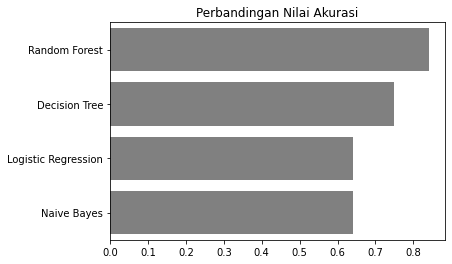

In [ ]:
nilainb = (metrics.accuracy_score(Y_test, nbpred))
nilairf = (metrics.accuracy_score(Y_test, rfpred))
nilaidt = (metrics.accuracy_score(Y_test, dtpred))
nilailr = (metrics.accuracy_score(Y_test, lrpred))

data = ['Random Forest','Decision Tree','Logistic Regression','Naive Bayes']
nilai = [nilairf,nilaidt,nilailr,nilainb]

sns.barplot(nilai, data, color='grey')
plt.title('Perbandingan Nilai Akurasi')
plt.show()